# EVALUATION PROJECT 1 : BASEBALL CASE STUDY

# Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W) 

In [1]:
#importing all the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import os

In [2]:
#getting data
os.chdir("C:\GitBash\Files")
df = pd.read_csv("baseball.csv")

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


## DATA INSPECTION

In [4]:
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.sample(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
22,71,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
21,83,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77


In [6]:
df.tail(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [7]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

OBSERVATION

Input features: R=Runs, AB=At Bats, H=Hits, 2B=Doubles, 3B=triples, HR=HomeRuns, BB=Base on Balls(/walk), SO=Strikeouts, SB=Stolen Bases, RA=Run Average, ER=Earned Runs, ERA=Earned Run Average, CG=Complete Games, SHO=Shutouts, SV=Save, E=Errors.

Output Target: W=Wins(Number of predicted wins)

Also,the dataset contains only numeric values.

In [8]:
#shape of data
df.shape

(30, 17)

OBSERVATION

DataSet contains 30 rows and 17 columns.

In [9]:
#datatypes of all columns
df.dtypes 

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

OBSERVATION

Dataset contains 16 integer and 1 float.

In [10]:
#information of all colmns from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# EXPLANATORY DATA ANALYSIS

In [11]:
#checking null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

OBSERVATION

There are no null values present in our dataset

STASTICAL VIEW

In [12]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


OBSERVATION

1.We can see that mean is greater than median in "AB","H" ,"HR" columns.

2.There is a large difference between 75th percentile and maximum value in the columns "R","SO","ER", so there might be a presence of large number of outliers.


In [13]:
#getting unique values in Target column
df.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [14]:
df["W"].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

OBSERVATION

There are many unique values in our target/dependent column which means the target data is imbalanced.

# Exploratory Data Analysis (EDA)

# HIST PLOT

<AxesSubplot:xlabel='W', ylabel='Count'>

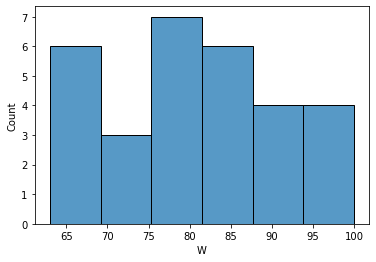

In [15]:
sns.histplot(df["W"])

<AxesSubplot:xlabel='R', ylabel='Count'>

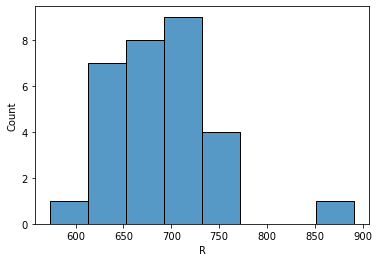

In [16]:
sns.histplot(df["R"])

<AxesSubplot:xlabel='H', ylabel='Count'>

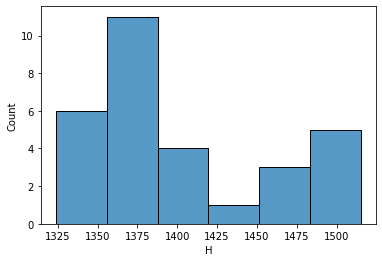

In [17]:
sns.histplot(df["H"])

<AxesSubplot:xlabel='2B', ylabel='Count'>

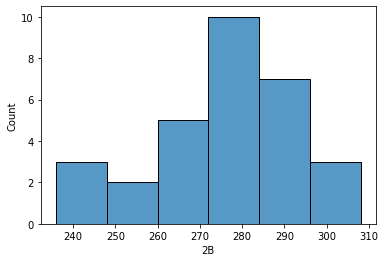

In [18]:
sns.histplot(df["2B"])

<AxesSubplot:xlabel='3B', ylabel='Count'>

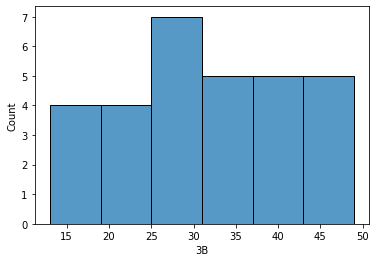

In [19]:
sns.histplot(df['3B'])

<AxesSubplot:xlabel='HR', ylabel='Count'>

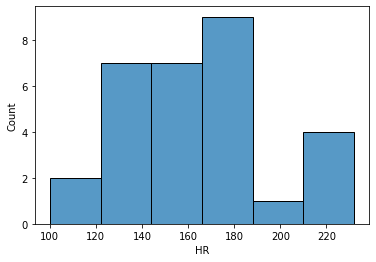

In [20]:
sns.histplot(df['HR'])

<AxesSubplot:xlabel='BB', ylabel='Count'>

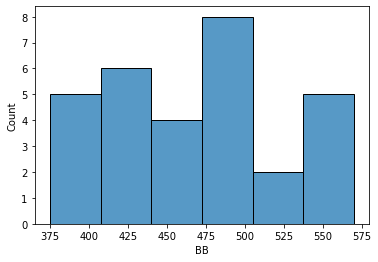

In [21]:
sns.histplot(df['BB'])

<AxesSubplot:xlabel='SO', ylabel='Count'>

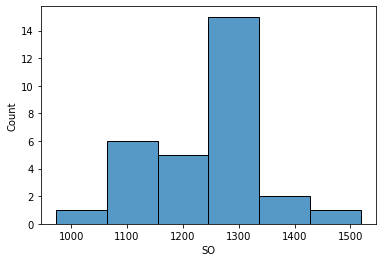

In [22]:
sns.histplot(df['SO'])

<AxesSubplot:xlabel='SB', ylabel='Count'>

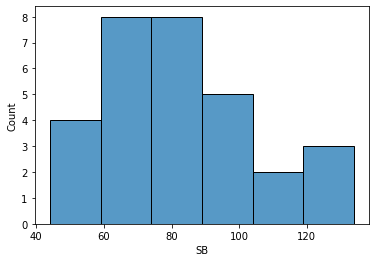

In [23]:
sns.histplot(df['SB'])

<AxesSubplot:xlabel='RA', ylabel='Count'>

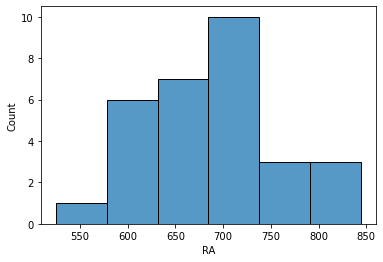

In [24]:
sns.histplot(df['RA'])

<AxesSubplot:xlabel='ER', ylabel='Count'>

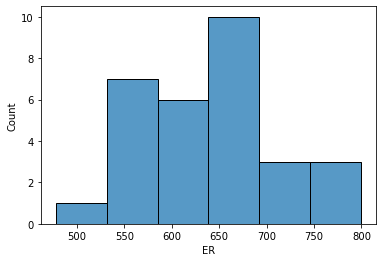

In [25]:
sns.histplot(df['ER'])

<AxesSubplot:xlabel='ERA', ylabel='Count'>

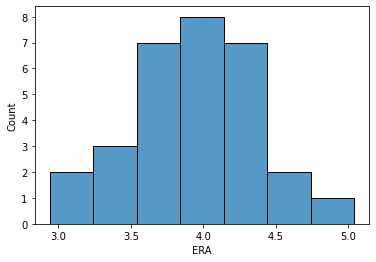

In [26]:
sns.histplot(df['ERA'])

<AxesSubplot:xlabel='CG', ylabel='Count'>

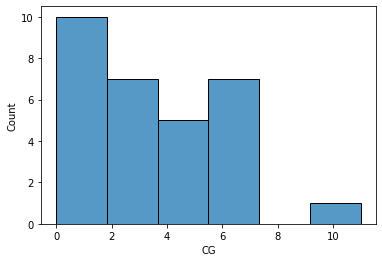

In [27]:
sns.histplot(df['CG'])

<AxesSubplot:xlabel='SHO', ylabel='Count'>

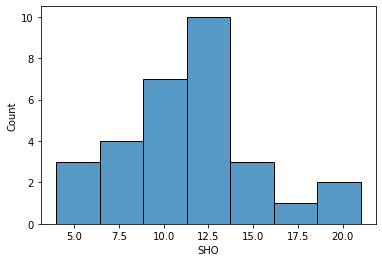

In [28]:
sns.histplot(df['SHO'])

<AxesSubplot:xlabel='SV', ylabel='Count'>

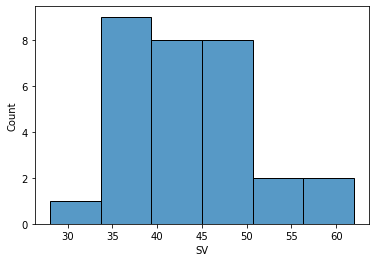

In [29]:
sns.histplot(df['SV'])

<AxesSubplot:xlabel='E', ylabel='Count'>

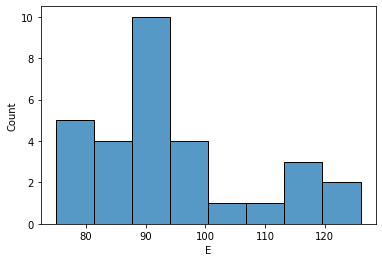

In [30]:
sns.histplot(df['E'])

OBSERVATION

Data Distribution is not normal in "W""R""AB""H""2B""3B" "HR""BB""SO""ER""CG"

# COUNT PLOT

<AxesSubplot:xlabel='W', ylabel='count'>

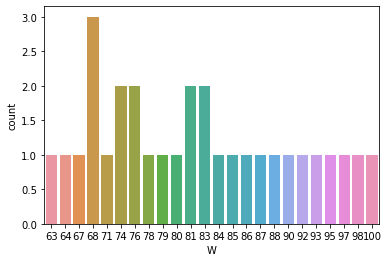

In [31]:
sns.countplot(df["W"])

<AxesSubplot:xlabel='R', ylabel='count'>

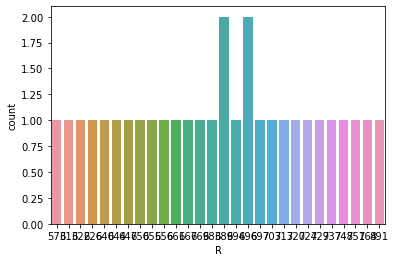

In [32]:
sns.countplot(df["R"])

<AxesSubplot:xlabel='AB', ylabel='count'>

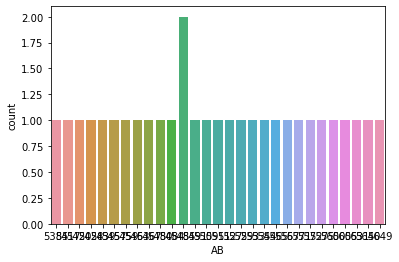

In [33]:
sns.countplot(df["AB"])

<AxesSubplot:xlabel='H', ylabel='count'>

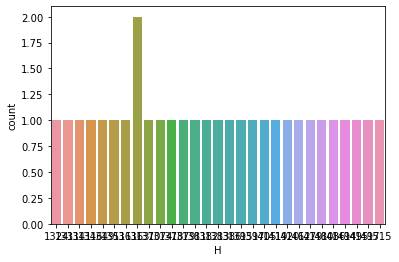

In [34]:
sns.countplot(df["H"])

<AxesSubplot:xlabel='2B', ylabel='count'>

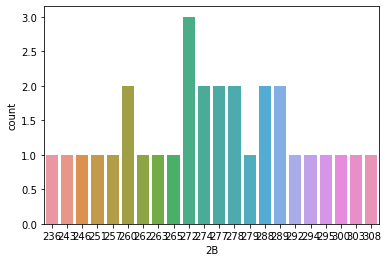

In [35]:
sns.countplot(df["2B"])

<AxesSubplot:xlabel='3B', ylabel='count'>

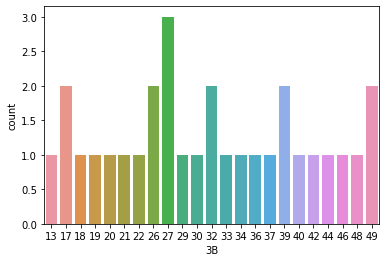

In [36]:
sns.countplot(df["3B"])

<AxesSubplot:xlabel='HR', ylabel='count'>

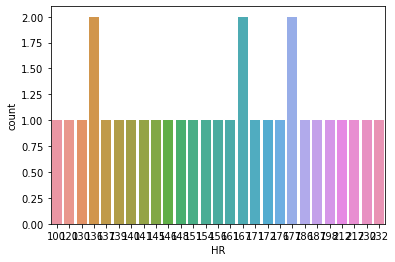

In [37]:
sns.countplot(df['HR'])

<AxesSubplot:xlabel='BB', ylabel='count'>

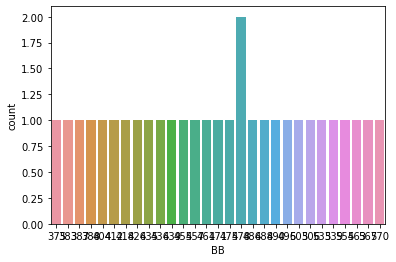

In [38]:
sns.countplot(df['BB'])

<AxesSubplot:xlabel='SO', ylabel='count'>

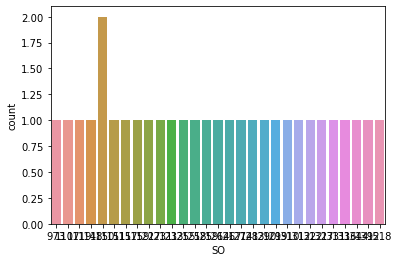

In [39]:
sns.countplot(df['SO'])

<AxesSubplot:xlabel='SB', ylabel='count'>

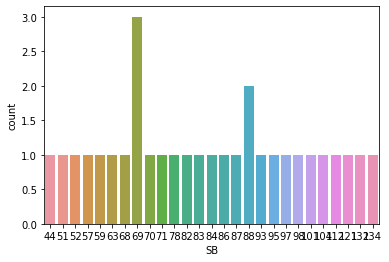

In [40]:
sns.countplot(df['SB'])

<AxesSubplot:xlabel='RA', ylabel='count'>

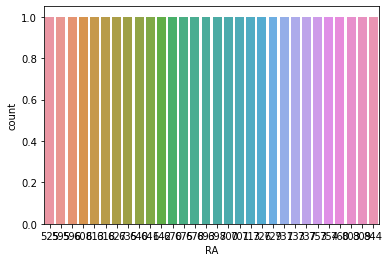

In [41]:
sns.countplot(df['RA'])

<AxesSubplot:xlabel='ER', ylabel='count'>

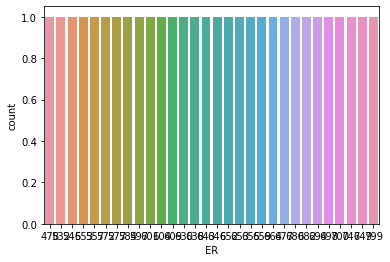

In [42]:
sns.countplot(df['ER'])

<AxesSubplot:xlabel='ERA', ylabel='count'>

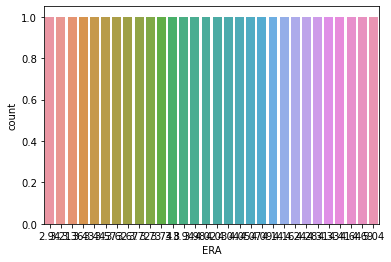

In [43]:
sns.countplot(df['ERA'])

<AxesSubplot:xlabel='CG', ylabel='count'>

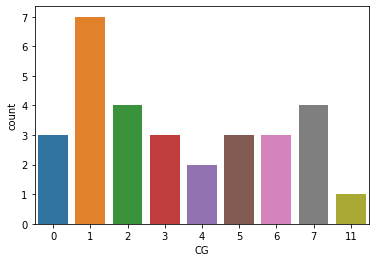

In [44]:
sns.countplot(df['CG'])

<AxesSubplot:xlabel='SHO', ylabel='count'>

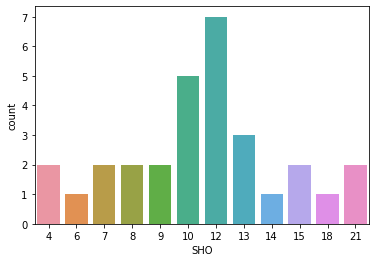

In [45]:
sns.countplot(df['SHO'])

<AxesSubplot:xlabel='SV', ylabel='count'>

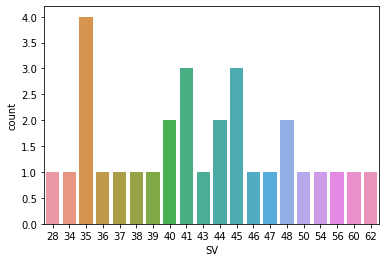

In [46]:
sns.countplot(df['SV'])

<AxesSubplot:xlabel='E', ylabel='count'>

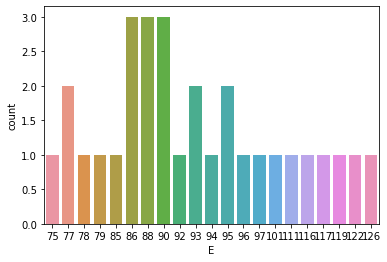

In [47]:
sns.countplot(df['E'])

OBSERVATION 

Data Distribution is normal "ERA" and "SHO" .

Standard deviation is not in the range of +/-1 in those columns which are not normal about the mean.



# SCATTERPLOT(PLOTTING B/W FEATURES AND LABLE)

<AxesSubplot:xlabel='R', ylabel='W'>

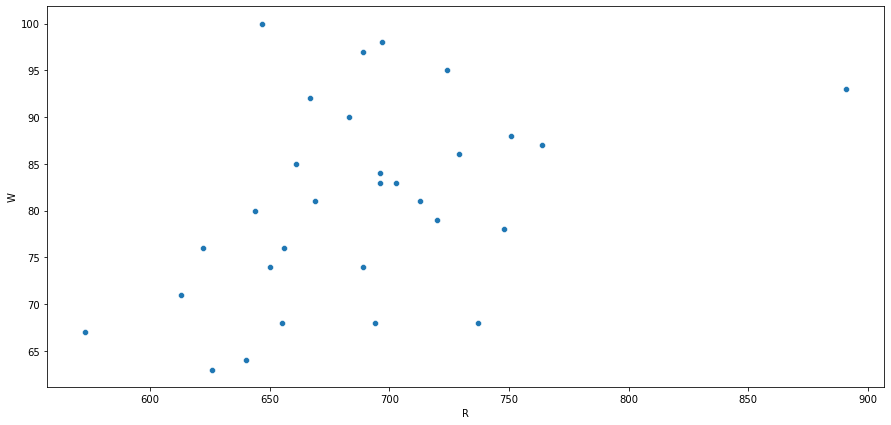

In [48]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="R" ,y ="W" ,data =df)

<AxesSubplot:xlabel='AB', ylabel='W'>

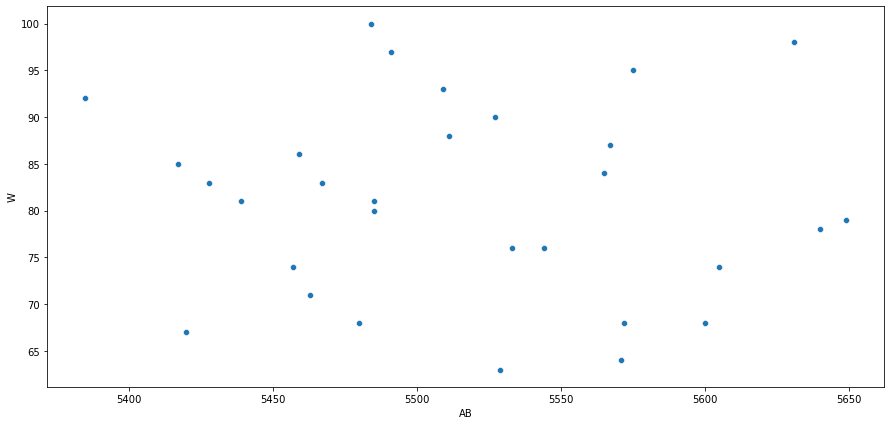

In [49]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="AB" ,y ="W" ,data =df)

<AxesSubplot:xlabel='H', ylabel='W'>

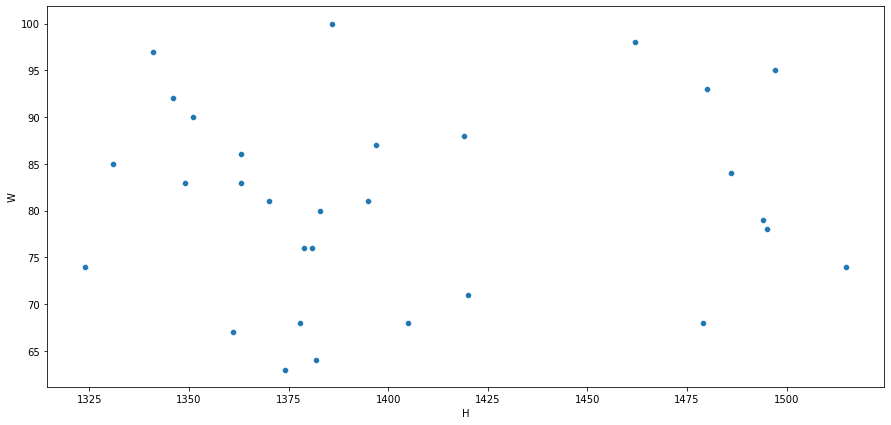

In [50]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="H" ,y ="W" ,data =df)

<AxesSubplot:xlabel='2B', ylabel='W'>

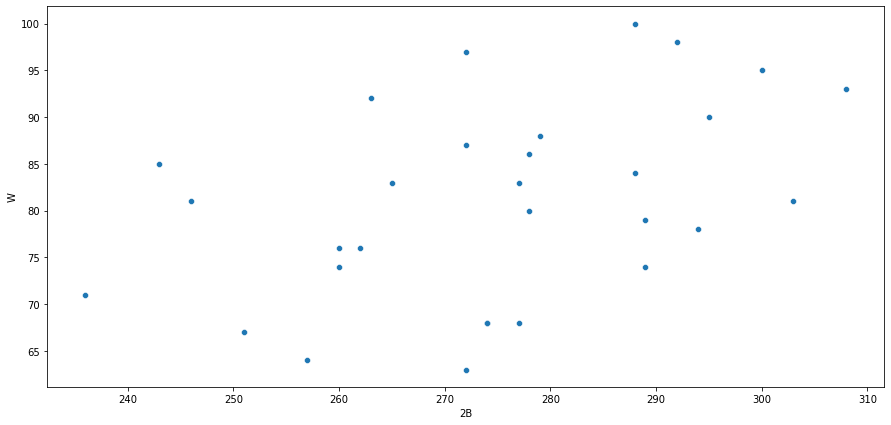

In [51]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="2B" ,y ="W" ,data =df)

<AxesSubplot:xlabel='3B', ylabel='W'>

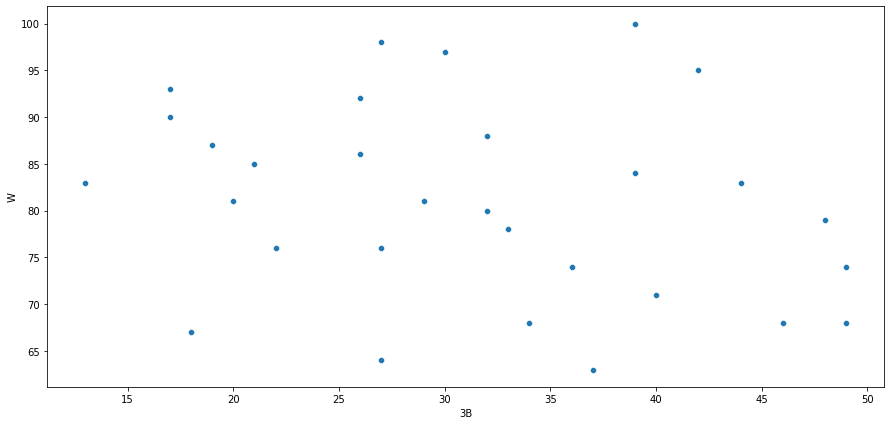

In [52]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="3B" ,y ="W" ,data =df)

<AxesSubplot:xlabel='HR', ylabel='W'>

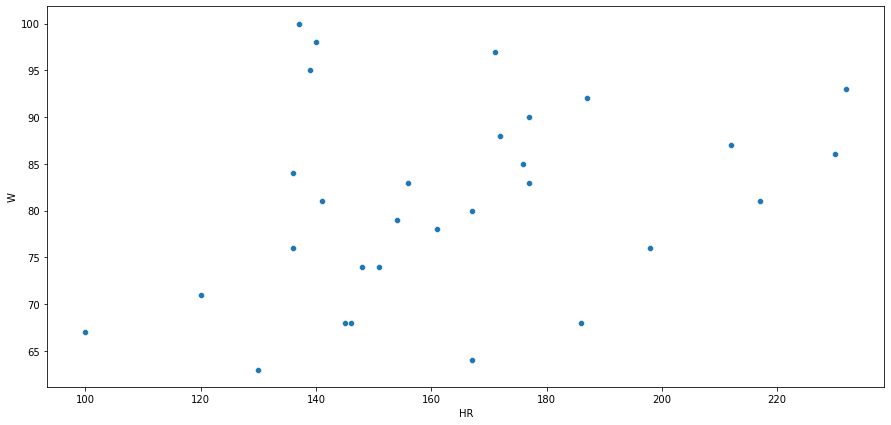

In [53]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="HR" ,y ="W" ,data =df)

<AxesSubplot:xlabel='BB', ylabel='W'>

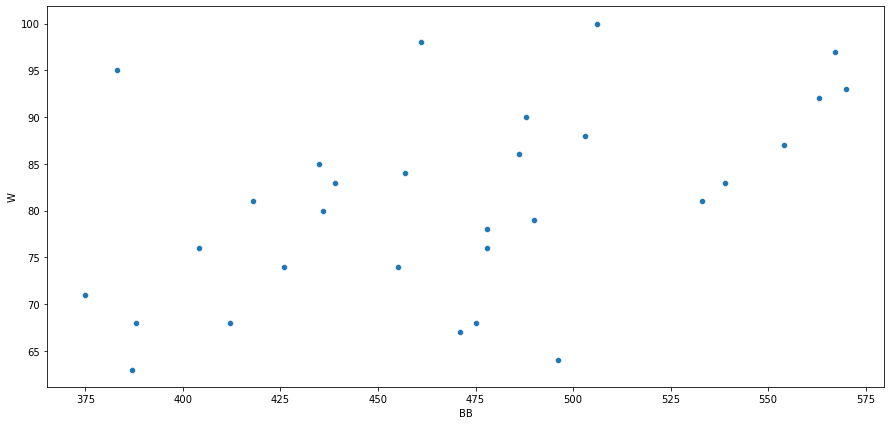

In [54]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="BB" ,y ="W" ,data =df)

<AxesSubplot:xlabel='SO', ylabel='W'>

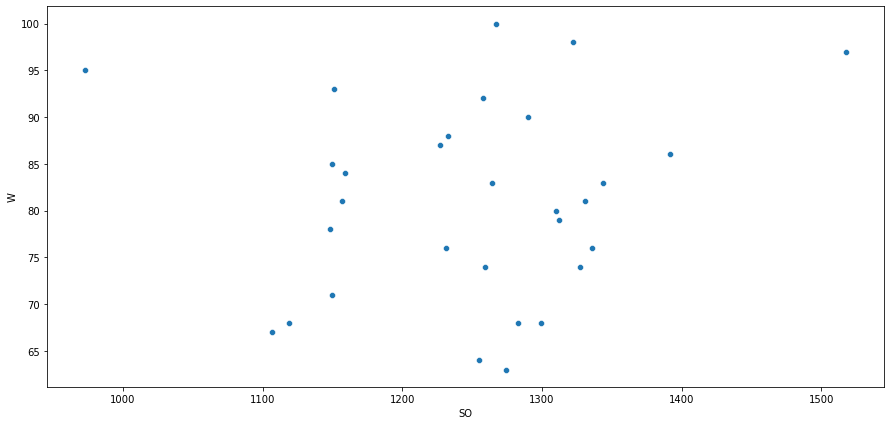

In [55]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="SO" ,y ="W" ,data =df)

<AxesSubplot:xlabel='SB', ylabel='W'>

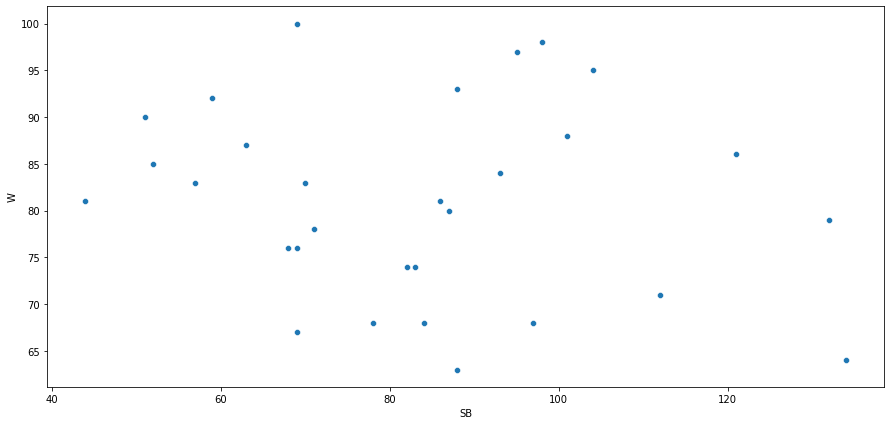

In [56]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="SB" ,y ="W" ,data =df)

<AxesSubplot:xlabel='RA', ylabel='W'>

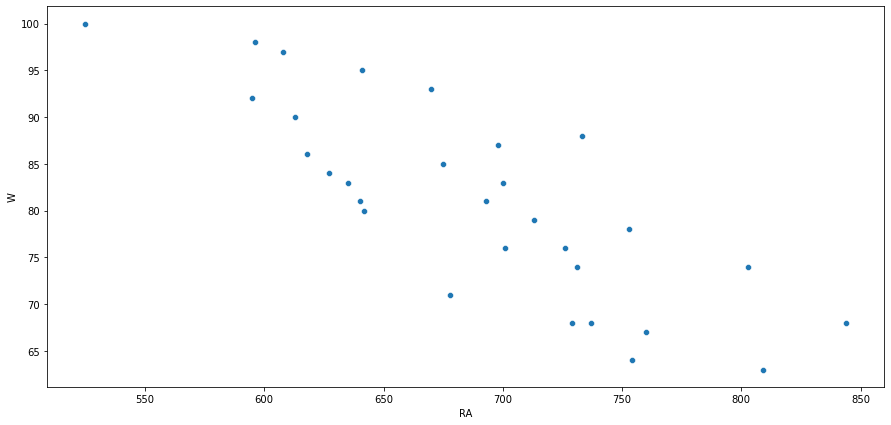

In [57]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="RA" ,y ="W" ,data =df)

<AxesSubplot:xlabel='ER', ylabel='W'>

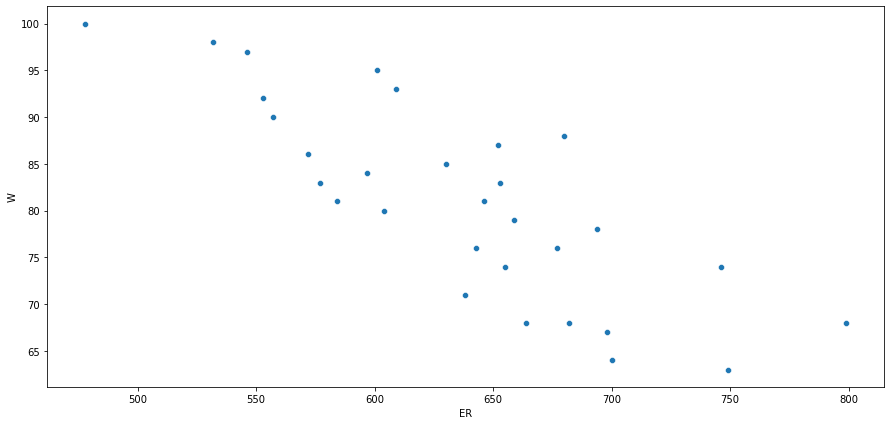

In [58]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="ER" ,y ="W" ,data =df)

<AxesSubplot:xlabel='ERA', ylabel='W'>

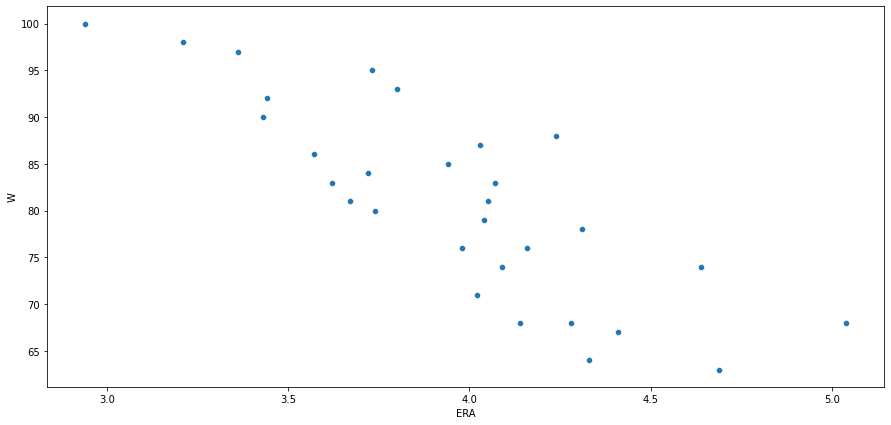

In [59]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="ERA" ,y ="W" ,data =df)

<AxesSubplot:xlabel='CG', ylabel='W'>

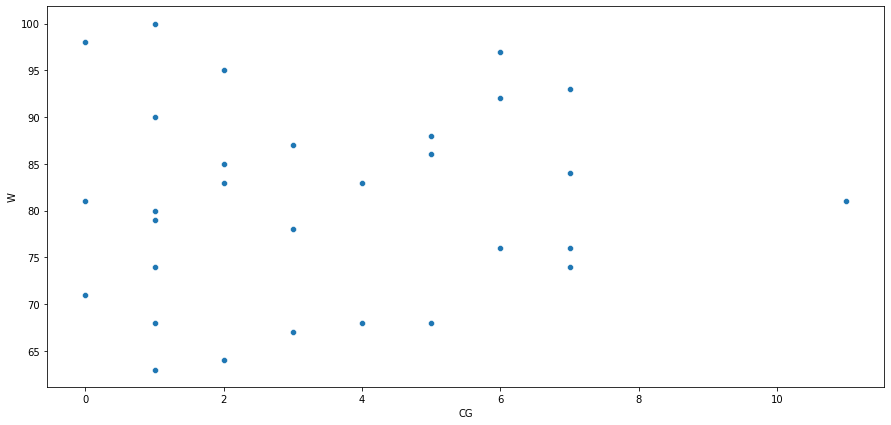

In [60]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="CG" ,y ="W" ,data =df)

<AxesSubplot:xlabel='SHO', ylabel='W'>

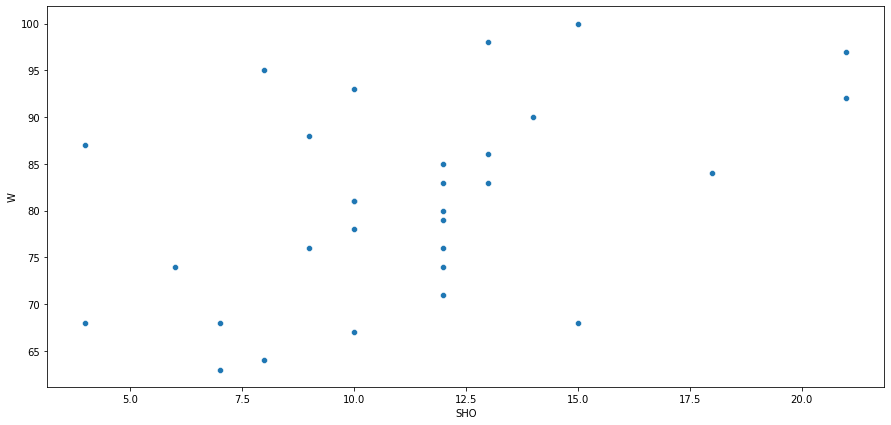

In [61]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="SHO" ,y ="W" ,data =df)

<AxesSubplot:xlabel='SV', ylabel='W'>

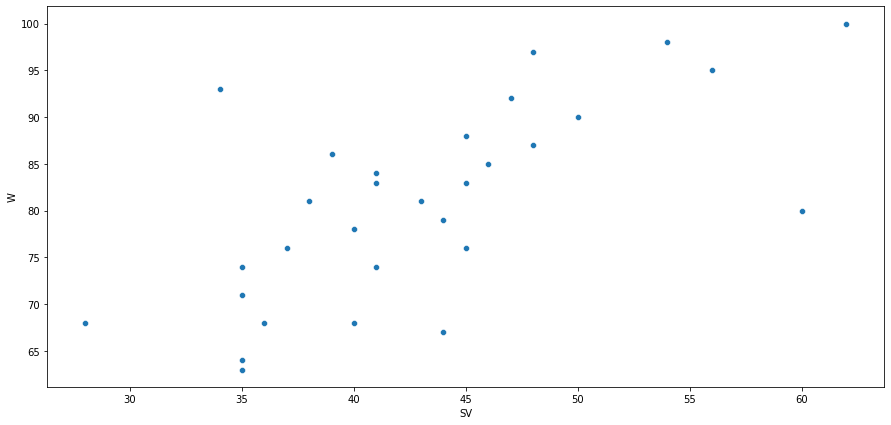

In [62]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="SV" ,y ="W" ,data =df)

<AxesSubplot:xlabel='E', ylabel='W'>

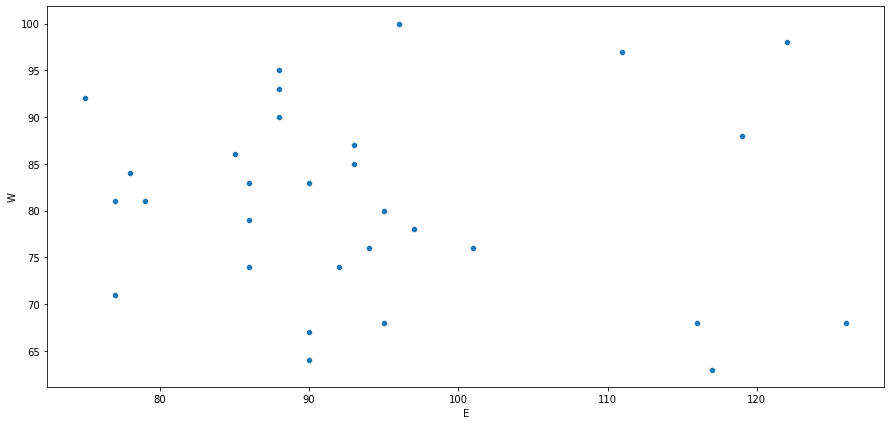

In [63]:
plt.rcParams['figure.figsize'] =(15 , 7)
sns.scatterplot(x="E" ,y ="W" ,data =df)

Observations:

1.The input features "RA","ER" and "ERA" are negatively impacting the target variable "W".

2.The input features "R","BB","SV","SHO","SO" are positively imapcting the target variable.

3.Remaining features are contributing some percent for the target variable.

# CORRELATION


In [64]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

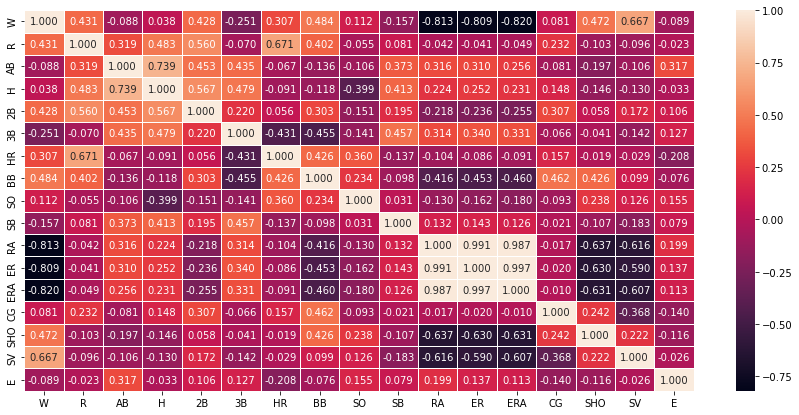

In [65]:
#ploting heatmap of correlation of all variables of data set
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.3f')

In [66]:
df.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

OBSERVATION


Dark shades indicates higly negative correlation.

Light shades indicates higly positive correlation.

Target variable"W" is having a highly negative correlation with the input features "RA","ER","ERA" as observed in the scatter graphs also.

# OUTLIERS

W          AxesSubplot(0.125,0.71587;0.133621x0.16413)
R       AxesSubplot(0.285345,0.71587;0.133621x0.16413)
AB       AxesSubplot(0.44569,0.71587;0.133621x0.16413)
H       AxesSubplot(0.606034,0.71587;0.133621x0.16413)
2B      AxesSubplot(0.766379,0.71587;0.133621x0.16413)
3B        AxesSubplot(0.125,0.518913;0.133621x0.16413)
HR     AxesSubplot(0.285345,0.518913;0.133621x0.16413)
BB      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
SO     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
SB     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
RA        AxesSubplot(0.125,0.321957;0.133621x0.16413)
ER     AxesSubplot(0.285345,0.321957;0.133621x0.16413)
ERA     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
CG     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
SHO    AxesSubplot(0.766379,0.321957;0.133621x0.16413)
SV           AxesSubplot(0.125,0.125;0.133621x0.16413)
E         AxesSubplot(0.285345,0.125;0.133621x0.16413)
dtype: object

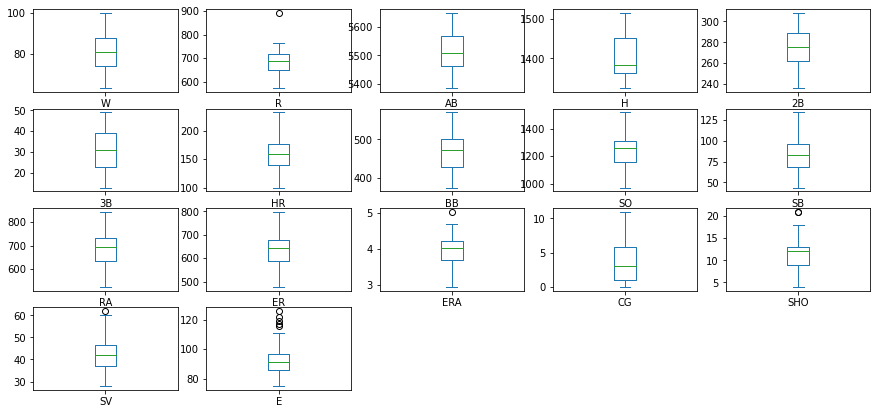

In [67]:
#checking outliers
df.plot(kind='box',subplots=True,layout=(4,5))

OBSERVATION

Many Outliesrs are present in "E" Boxplot.

# NORMAL DISTRIBUTION CURVE

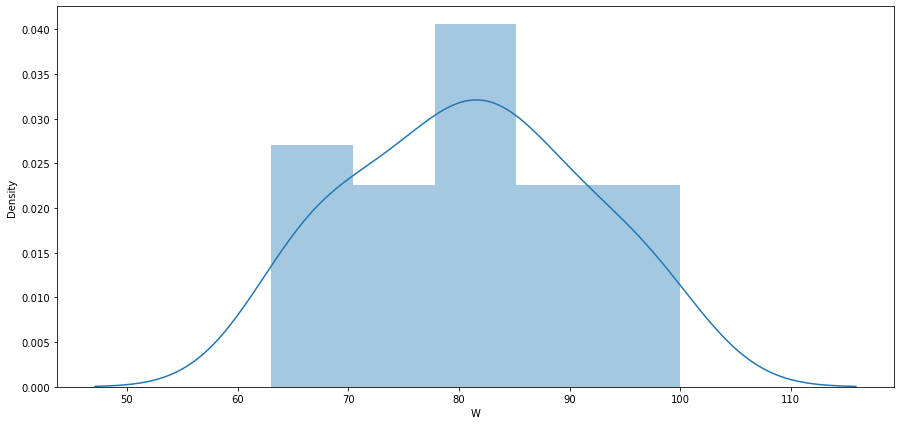

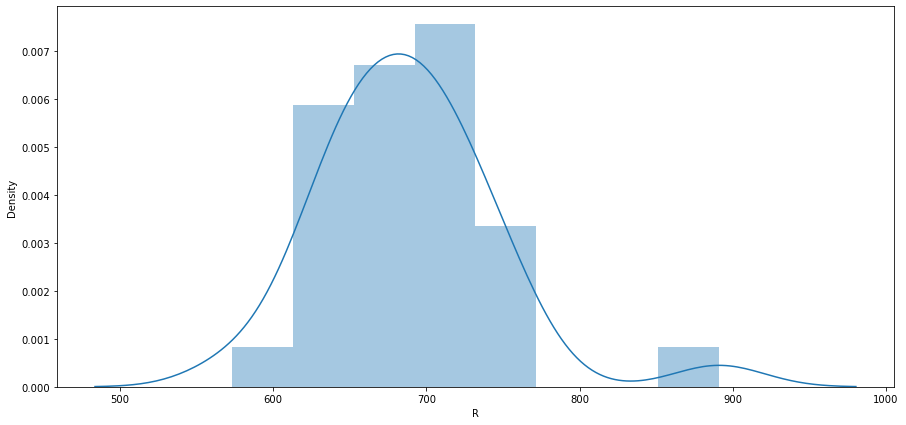

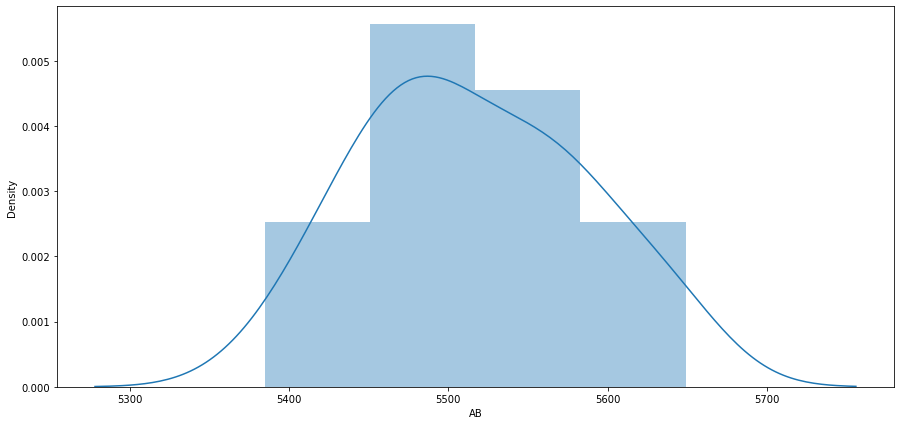

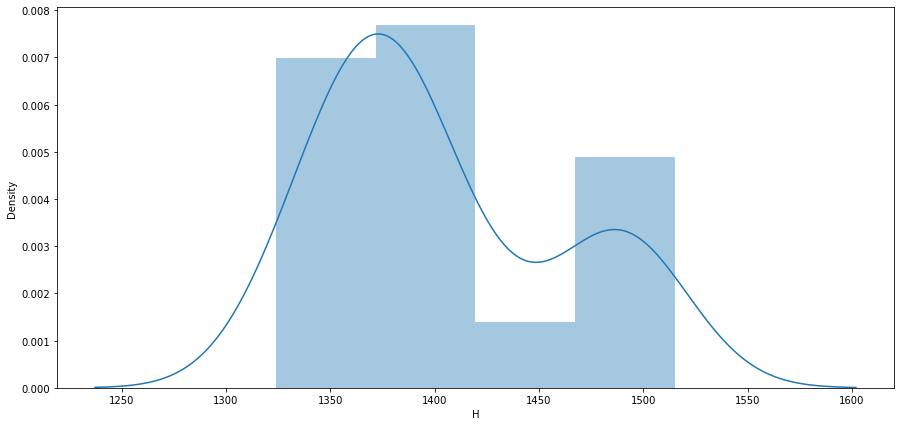

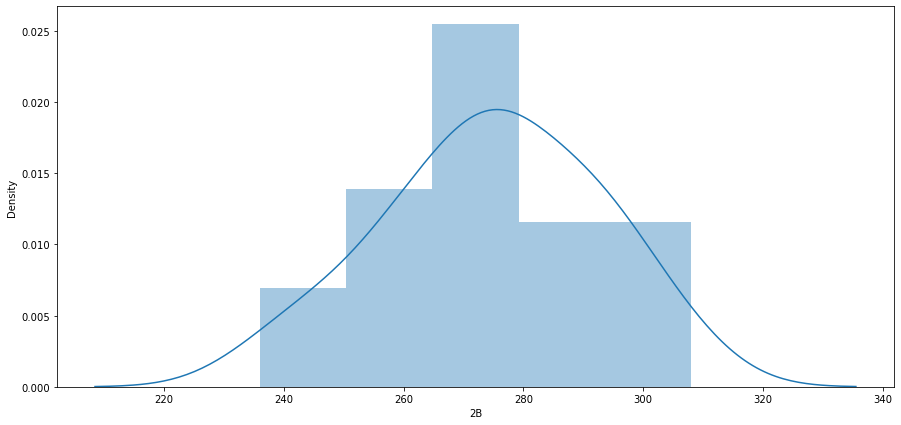

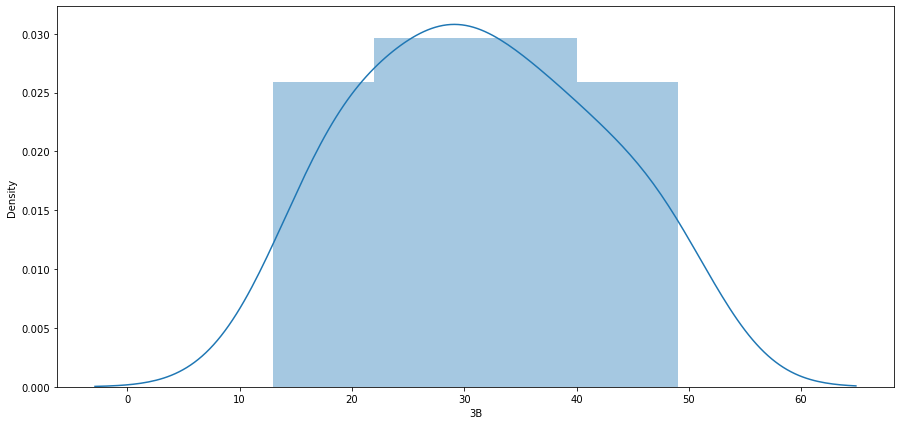

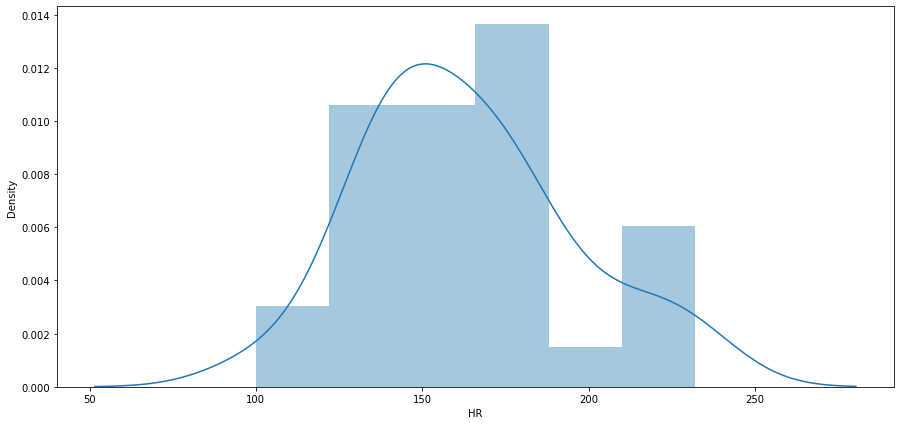

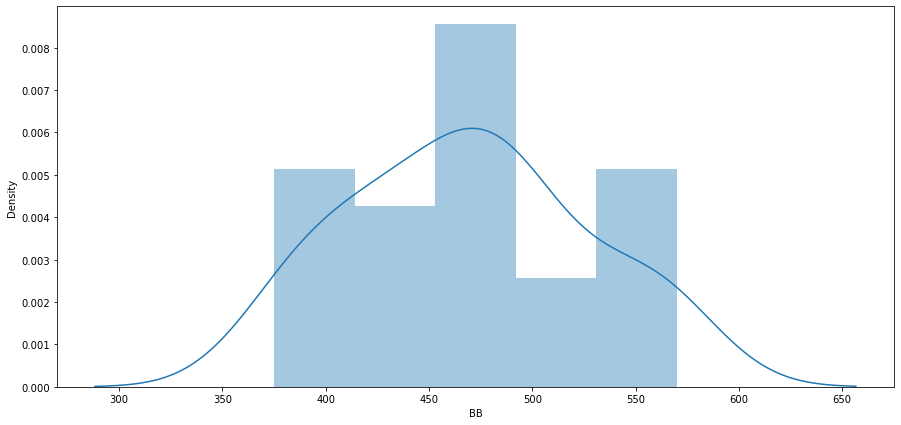

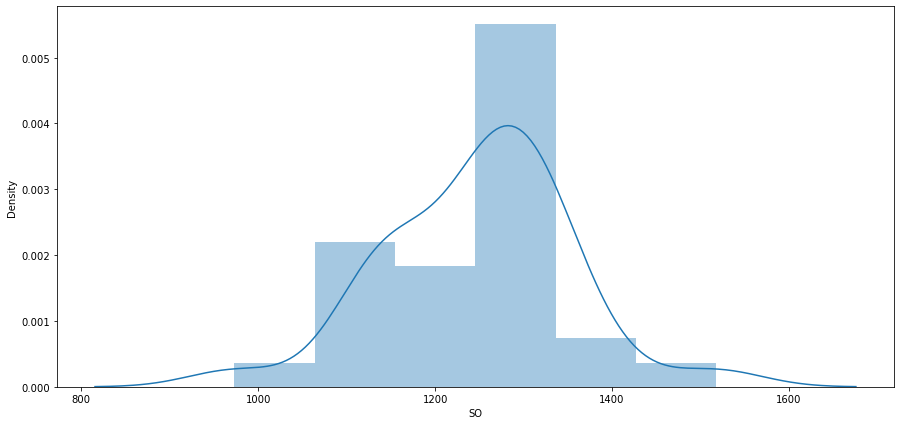

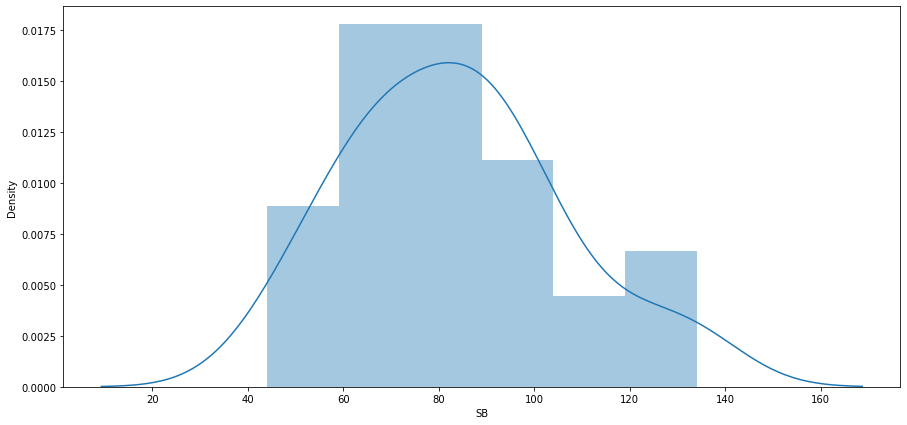

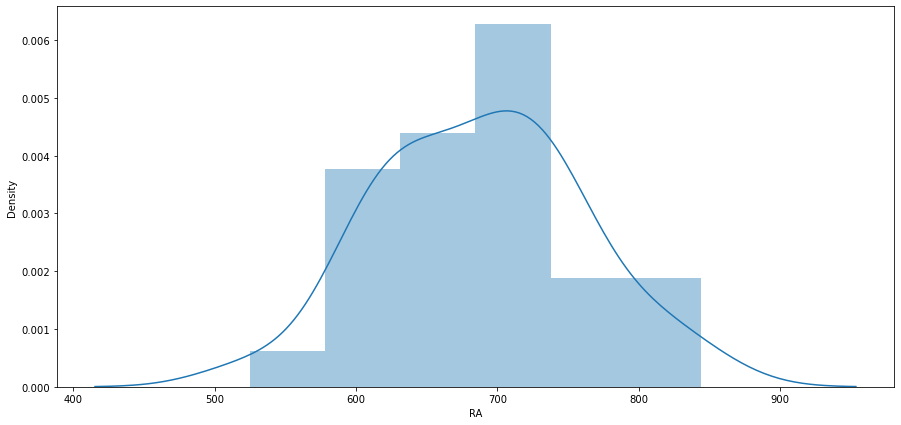

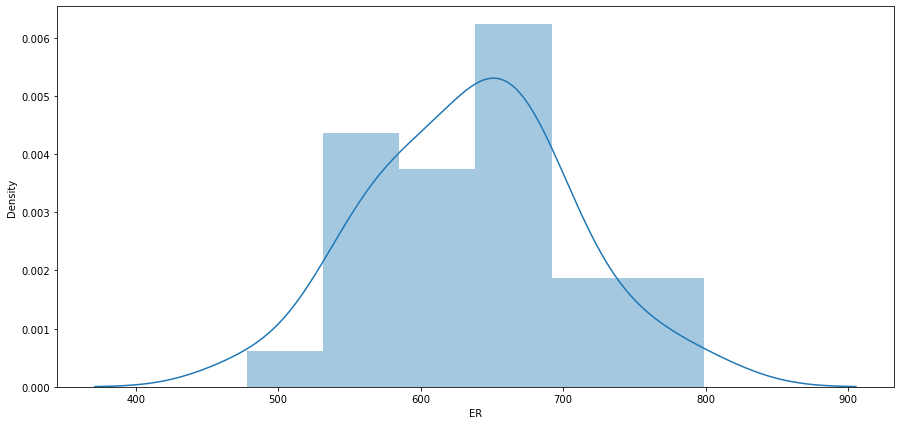

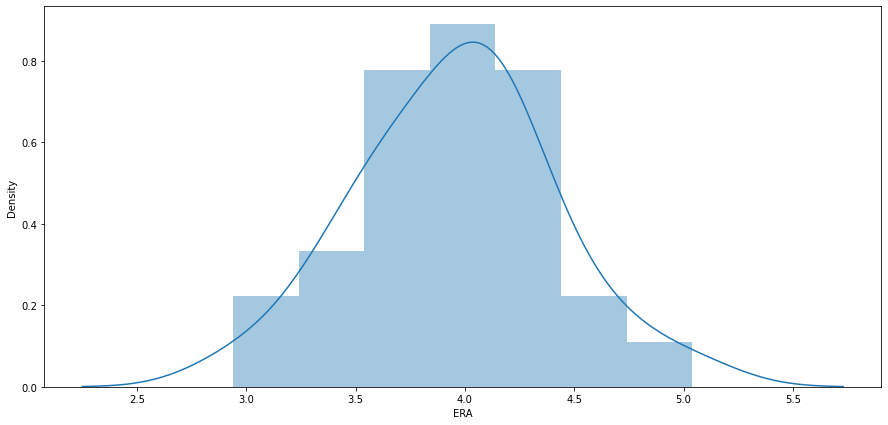

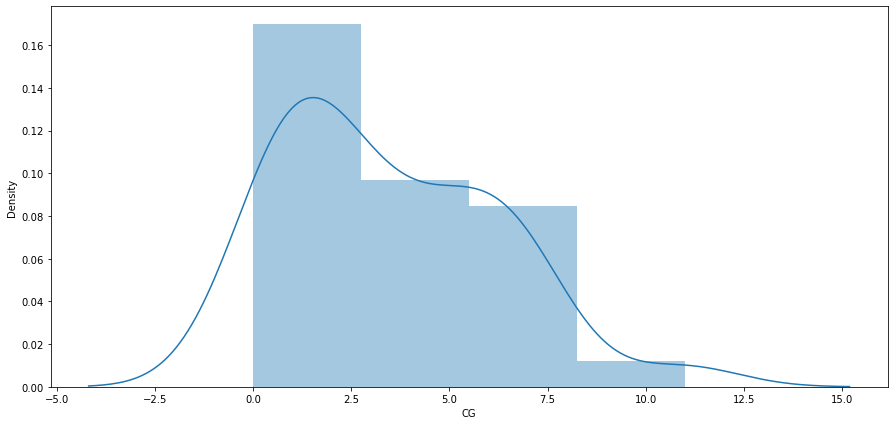

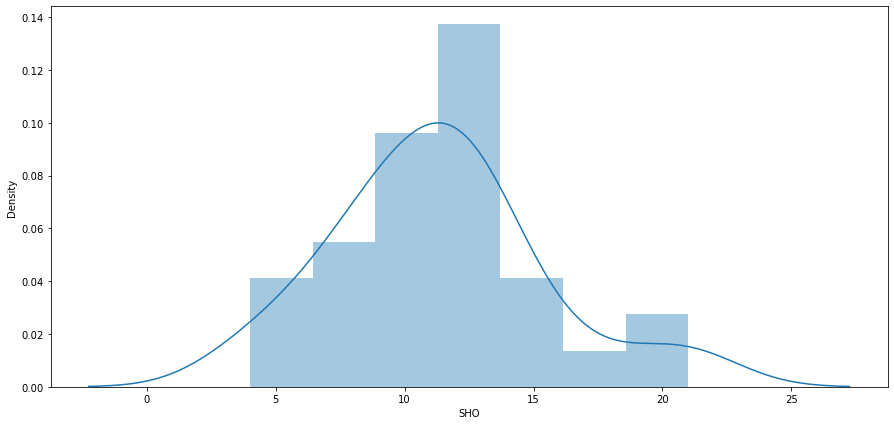

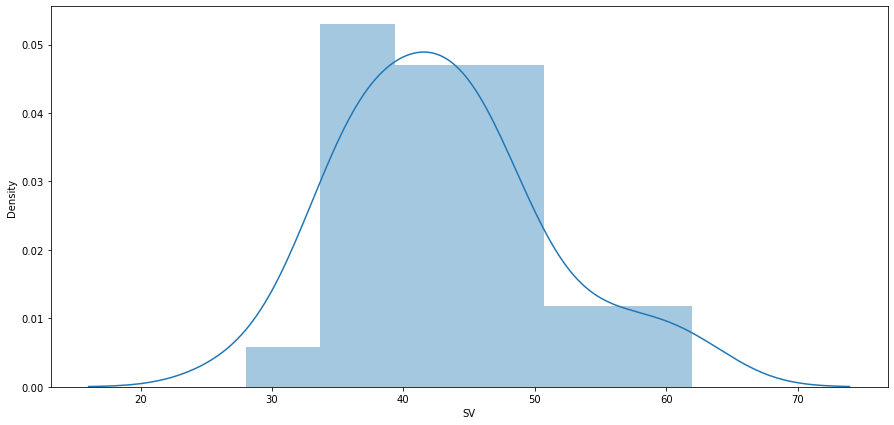

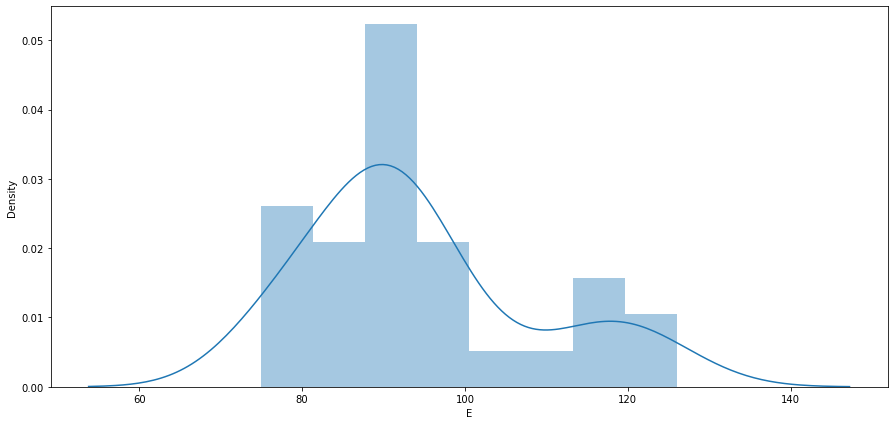

In [68]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

## PAIRPLOT 

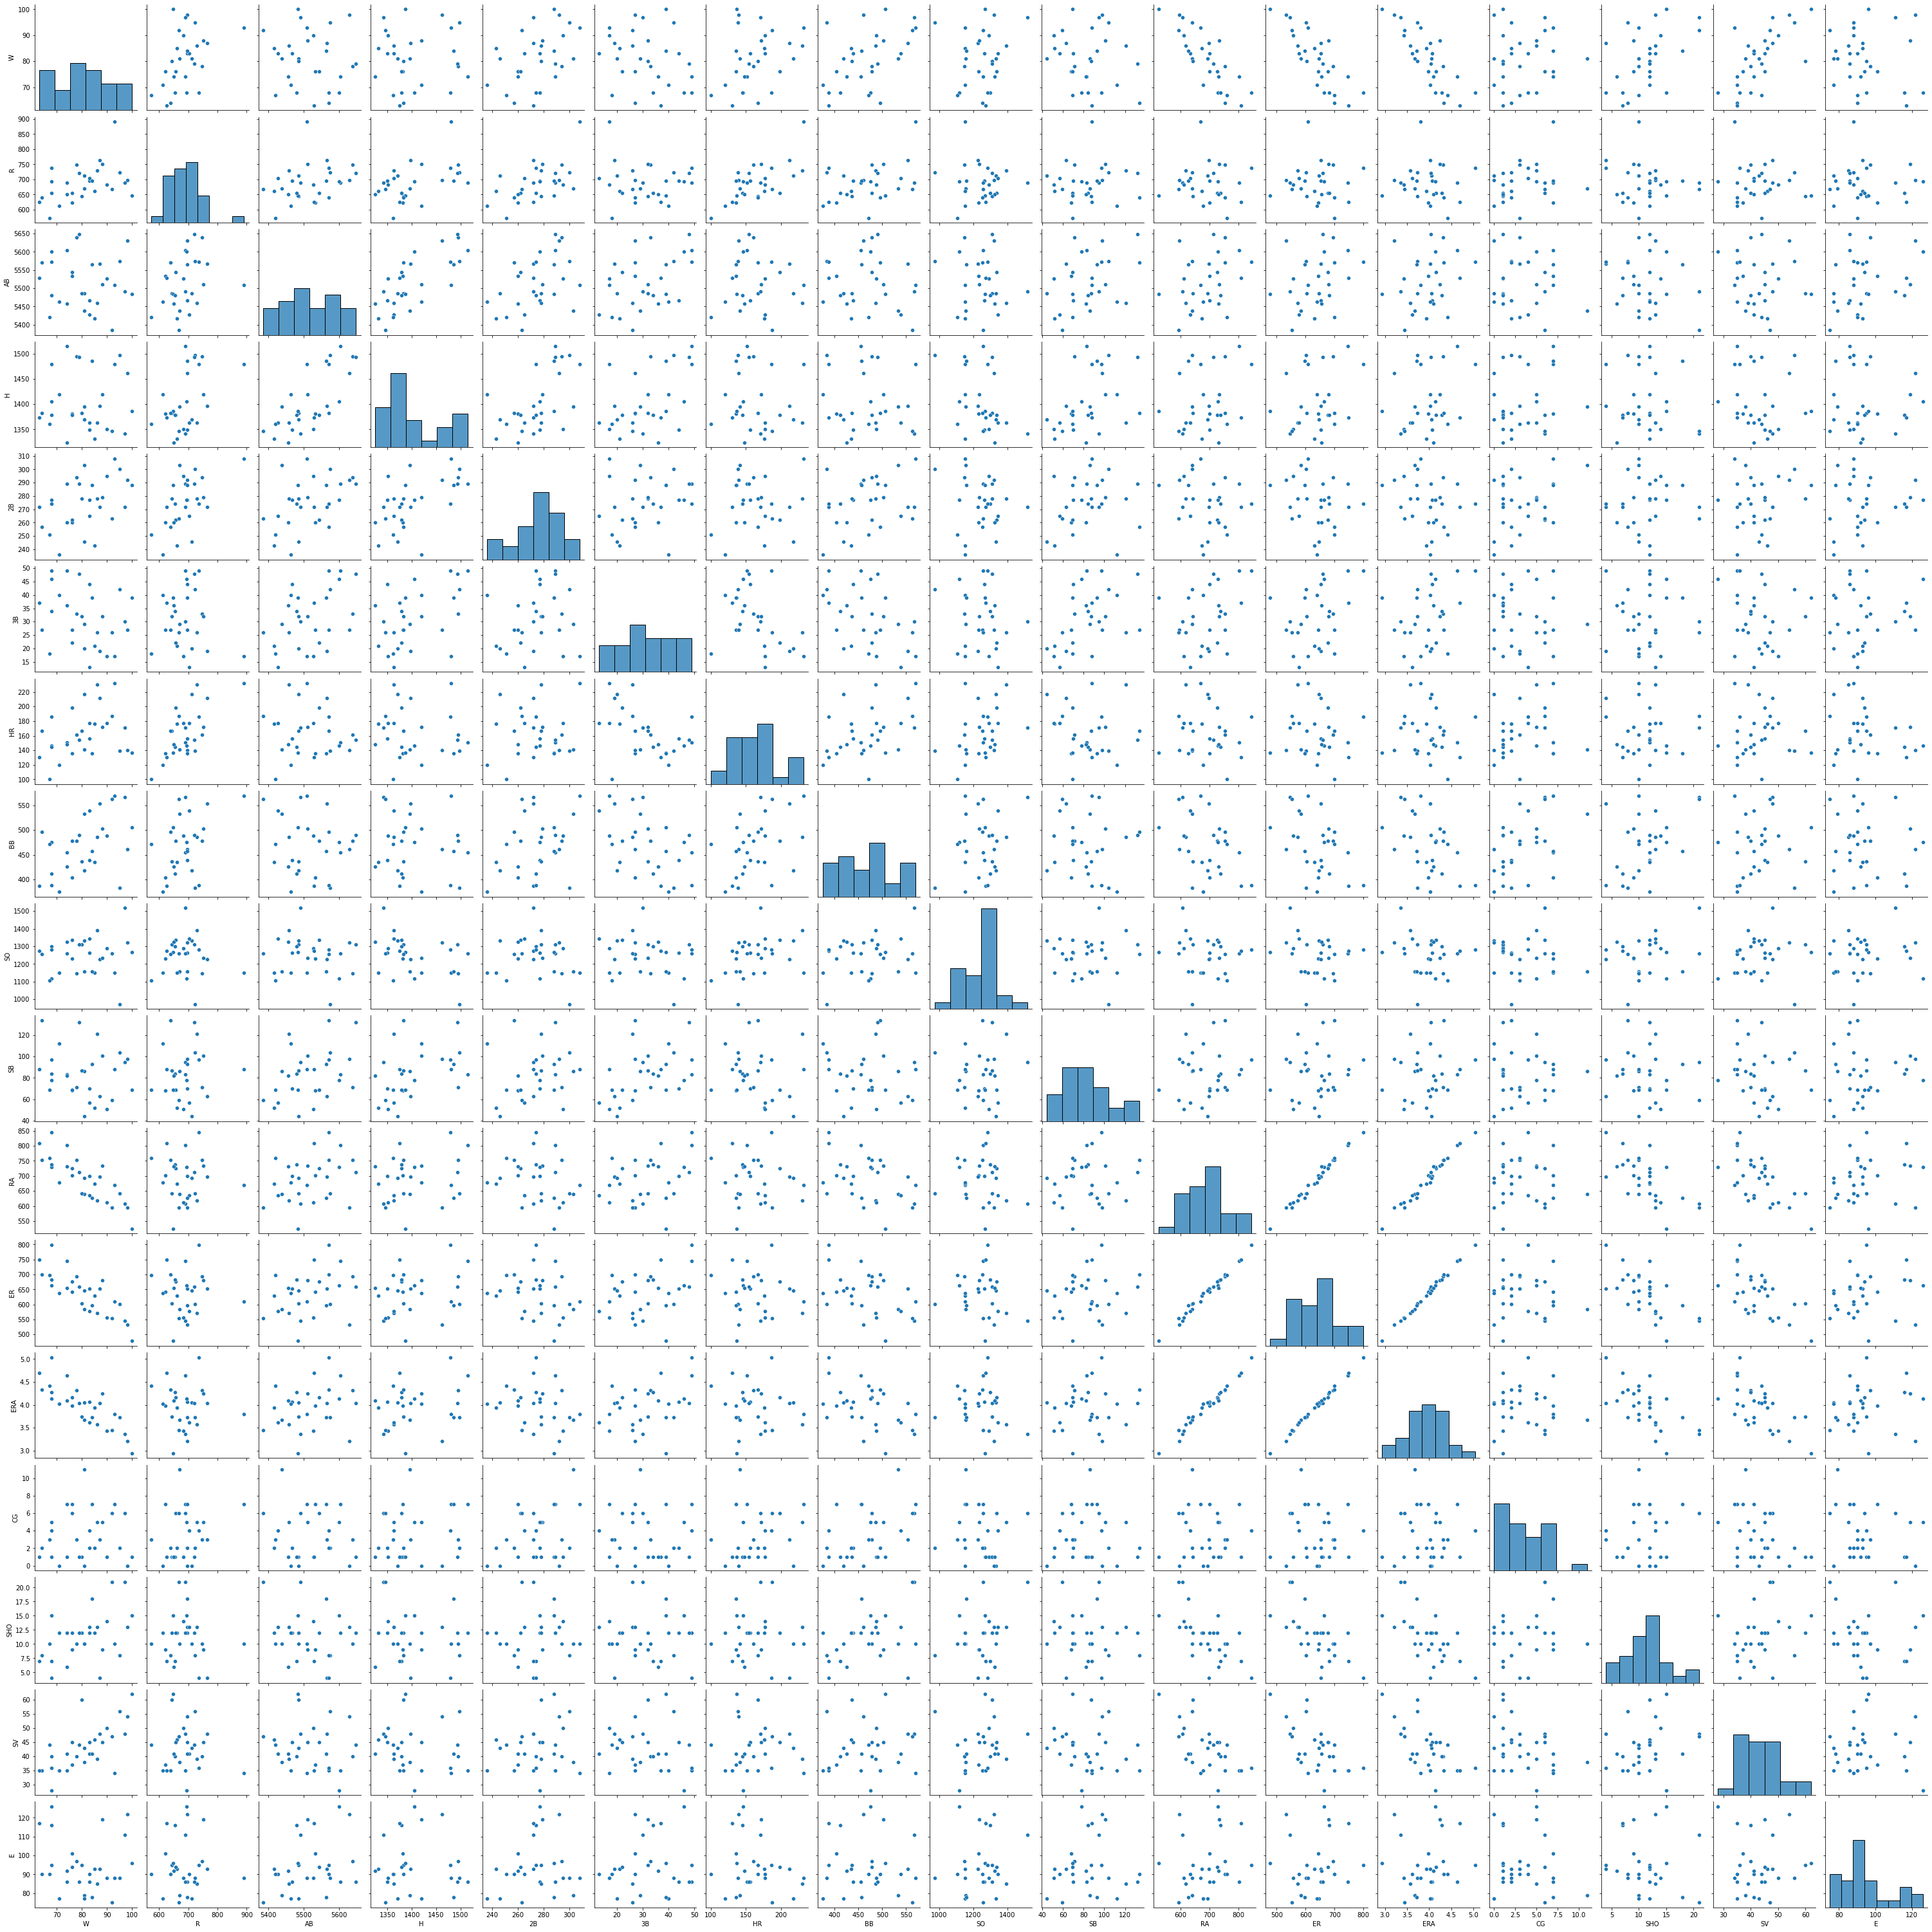

In [69]:
sns.pairplot(df)

## SKEWNESS 

In [70]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [71]:
df.skew().sort_values()

2B    -0.230650
SO    -0.156065
RA     0.045734
W      0.047089
ERA    0.053331
ER     0.058710
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
H      0.670254
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

OBSERVATION

We can see that the data is skewed in "R""E" "H", "CG", "SV", "SHO","HR" columns. 

We will correct the skewness after we check VIF factor and determine which columns to drop


##  MultiCollinearity with Variance Inflation Factor 

In [88]:
# copying the dataframe
df1=pd.DataFrame(data=df)       
df1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [89]:
x1=df1.iloc[:,1:]
y1=df1.iloc[:,0]

In [90]:
x1

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [92]:
x1.shape

(30, 16)

In [93]:
y1

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [94]:
# Importing Required Libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [96]:
calc_vif(x1)

,variables,VIF FACTOR
0,R,1638.985029
1,AB,4277.157018
2,H,4698.798408
3,2B,904.439835
4,3B,32.435486
5,HR,285.773237
6,BB,269.485018
7,SO,398.234104
8,SB,28.654970
9,RA,17204.829356


OBSERVATION

"ER" column has the highest VIF so we need to frop the column

In [97]:
x1=df1.drop(['ER'],axis=1)

In [98]:
calc_vif(x1)

,variables,VIF FACTOR
0,W,1134.084626
1,R,3165.873149
2,AB,4957.222580
3,H,4209.154565
4,2B,1134.455638
5,3B,30.345744
6,HR,239.587650
7,BB,299.279981
8,SO,366.553169
9,SB,27.546490


OBSERVATION

"RA" column has the highest VIF now so we will drop this column too

In [100]:
x1=df1.drop(['ER','RA'],axis=1)

In [101]:
calc_vif(x1)

,variables,VIF FACTOR
0,W,1102.620419
1,R,3061.013600
2,AB,4931.535495
3,H,4173.065128
4,2B,1062.721139
5,3B,30.281934
6,HR,238.479206
7,BB,259.044664
8,SO,333.976519
9,SB,26.970708


Observations:

Dropping 'ER','RA' reduces the VIF of many columns. 




# DATA PREPROCESSING

### DATA CLEANING 

In [103]:
#dropping "ER" &"RA" columns
df.drop(['ER','RA'],axis=1,inplace=True)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,4.31,3,10,40,97


In [104]:
#shape of dataframe after data cleaning
df.shape

(30, 15)

## REMOVING OUTLIERS 

In [105]:
# import libraries
from scipy.stats import zscore
#fetting z score
z=np.abs(zscore(df))
z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.792164,0.171757,0.320914,0.396360,0.194303


In [106]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [107]:
#row and column
z.iloc[5,1]

3.5096470447193067

In [108]:
z.shape

(30, 15)

In [109]:
len(np.where(z>3)[0])

1

In [110]:
# removing outliers
df_new=df[(z<3).all(axis=1)]
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df.shape[0] - df_new.shape[0])

Old Dataframe (30, 15)
New Dataframe (29, 15)
total_dropped_rows 1


OBSERVATION

1 ROW could be dropped using ZSCORE value

## LOSS PERCENTAGE 

In [111]:
#percentage data loss
loss_percent=(30-29)/30*100
loss_percent

3.3333333333333335

OBSERVATION

3.3333333% data loss is visible by comparing the rows in our original data set and the new data set which is acceptable

In [112]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

OBSERVATION

Some columns are showing slight skewness with respect to the threshold value  of skewness  +/-0.5.

## Splitting the new dataset into Features and Target 


In [113]:
X = df_new.iloc[:,1:]     
y = df_new.iloc[:,0]

In [114]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,4.24,5,9,45,119


In [115]:
X.shape

(29, 14)

In [116]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [117]:
y.shape

(29,)

In [118]:
X.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

OBSERVATION 

We ill use 'power transformation' to remove skewness in our feature column that has skewness present in it "CG""SV""E""SHO""SB"

#### REMOVING SKEWNESS 

In [119]:
skewed_features = ["CG","SV","E","SHO","SB"]

In [125]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer

In [126]:
transf = PowerTransformer(method='yeo-johnson')

In [127]:
X[skewed_features] = transf.fit_transform(X[skewed_features].values)

In [128]:
X[skewed_features].head()

,CG,SV,E,SHO,SB
0,-0.307098,1.532753,-0.348265,-0.787002,0.936132
1,-0.307098,0.312020,-0.540820,0.236737,-0.516377
2,2.011315,-0.664137,-1.326125,-0.252844,0.225038
3,1.264463,-0.820689,0.650818,-0.513555,-0.618422
4,1.264463,-1.149165,-0.540820,0.236737,0.095038


In [129]:
X.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB    -0.009570
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

OBSERVATION

SKEWNESS REMOVED THROUGH POWER TRANSFOR(YEO-JOHNSON)

# STANDARD SCALING

In [130]:
#importing library
from sklearn.preprocessing import StandardScaler
#scaling features
sc=StandardScaler()
x1 = sc.fit_transform(X)
x1

array([[ 9.59398345e-01,  8.30084222e-01,  1.73830631e+00,
         1.55653766e+00,  1.01084549e+00, -7.65863143e-01,
        -1.53635899e+00, -2.72762331e+00,  9.36131648e-01,
        -5.11388277e-01, -3.07098204e-01, -7.87002186e-01,
         1.53275292e+00, -3.48265262e-01],
       [ 3.31147171e-01, -7.02830744e-01, -9.38697881e-01,
         2.01171316e-01,  1.20891656e+00, -1.81388639e-01,
        -4.95020511e-01,  1.21895521e-01, -5.16377335e-01,
         2.38952260e-01, -3.07098204e-01,  2.36736538e-01,
         3.12020186e-01, -5.40819806e-01],
       [-2.74666462e-01, -1.10025314e+00, -1.06656038e-01,
         1.73332457e+00, -2.76616501e-01, -6.97101437e-01,
         1.25294051e+00, -9.25865699e-01,  2.25038365e-01,
        -6.43801313e-01,  2.01131531e+00, -2.52844176e-01,
        -6.64136739e-01, -1.32612477e+00],
       [-1.32923093e+00,  2.33950624e-01, -3.59886164e-01,
        -8.00621197e-01, -4.74687576e-01, -8.69005703e-01,
        -1.14585706e+00, -2.01245790e-01, -6.

REASSIGNING COLUMN NAMES

In [131]:
X.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'ERA', 'CG', 'SHO',
       'SV', 'E'],
      dtype='object')

In [132]:
x = pd.DataFrame(x1,columns=X.columns)

In [133]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.936132,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.516377,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.225038,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.618422,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,0.095038,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.884526,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-2.082843,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.267558,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.466233,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.824915,0.614123,0.770649,-0.513555,0.312020,1.554265


In [134]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB    -0.009570
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

In [135]:
calc_vif(x)

,variables,VIF FACTOR
0,R,6.163117
1,AB,5.220723
2,H,8.369874
3,2B,3.205208
4,3B,3.142543
5,HR,6.339287
6,BB,3.050467
7,SO,2.255387
8,SB,1.885424
9,ERA,4.797563


OBSERVATION

Skewness is REDUCED
VIF is REDUCED.

NOW the Data Set is ready for MACHINE LEARNING

# MACHINE LEARNING

#### Since the y (Target Column) has continuous values we will use Linear Regression model. 

### FINDING BEST RANDOM STATE 

In [136]:
3importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
lr = LinearRegression()

In [138]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is :  {r2_score(y_test,pred_test)}")
    print("\n")

At random state 1, the training accuracy is : 0.9589350047369717
At random state 1, the testing accuracy is :  0.7762812648379206


At random state 2, the training accuracy is : 0.9559851430540451
At random state 2, the testing accuracy is :  -0.3442611803143061


At random state 3, the training accuracy is : 0.9418647885585766
At random state 3, the testing accuracy is :  0.873025867651172


At random state 4, the training accuracy is : 0.9529556359413809
At random state 4, the testing accuracy is :  0.8202372322306555


At random state 5, the training accuracy is : 0.956124731506768
At random state 5, the testing accuracy is :  0.5202058898278654


At random state 6, the training accuracy is : 0.9293424004396397
At random state 6, the testing accuracy is :  0.935898781790909


At random state 7, the training accuracy is : 0.952034798822469
At random state 7, the testing accuracy is :  0.6887241567500264


At random state 8, the training accuracy is : 0.9684204165292023
At random stat

OBSERVATION

Both  Training and Testing accuracy is good in the random state 47.

At random state 47, the training accuracy is : 0.9278230594851875
At random state 47, the testing accuracy is :  0.9815428783489649

In [139]:
#getting r2 score at the best random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9815428783489649 on Random State 47


OBSERVATION

Getting r2 score best at thr random state 47.

### TRAIN TEST SPLIT 

In [140]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=47)

In [141]:
x_train.shape

(23, 14)

In [142]:
x_test.shape

(6, 14)

In [143]:
y_train.shape

(23,)

In [144]:
y_test.shape

(6,)

In [145]:
lr.fit(x_train,y_train)

LinearRegression()

In [146]:
pred_test = lr.predict(x_test)

In [147]:
print(r2_score(y_test,pred_test))

0.9815428783489649


### CROSS VALIDATION 

In [148]:
from sklearn.model_selection import cross_val_score

In [149]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

for j in range(4,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print(f"accuracy score for training is {train_accuracy}")
    print(f"accuracy score for testing is {test_accuracy}")
    print("\n")

At cross fold 4 the cv score is 0.3647110555072238
accuracy score for training is -1.2904889815598213
accuracy score for testing is 0.9815428783489649


At cross fold 5 the cv score is 0.37834726290143716
accuracy score for training is -1.2904889815598213
accuracy score for testing is 0.9815428783489649


At cross fold 6 the cv score is 0.33800151121173405
accuracy score for training is -1.2904889815598213
accuracy score for testing is 0.9815428783489649


At cross fold 7 the cv score is 0.19100470755126997
accuracy score for training is -1.2904889815598213
accuracy score for testing is 0.9815428783489649


At cross fold 8 the cv score is 0.3853632870483774
accuracy score for training is -1.2904889815598213
accuracy score for testing is 0.9815428783489649


At cross fold 9 the cv score is -6.421191407572922
accuracy score for training is -1.2904889815598213
accuracy score for testing is 0.9815428783489649




#### PLOTTING LINEAR REGRESSION PLOT TO SEE THE BEST FIT LINE 

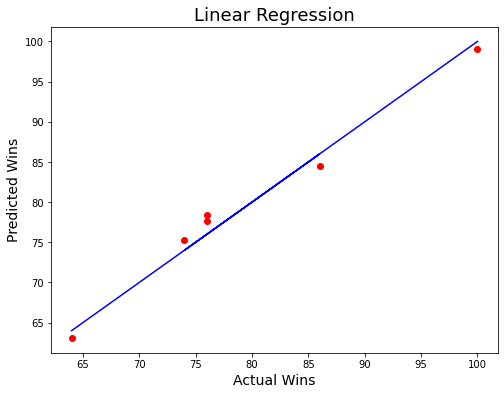

In [150]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins', fontsize=14)
plt.ylabel('Predicted Wins', fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()


OBSERVATION 

OUR MODEL IS ALMOST FITTING THE BEST FIT LINE

# RUNNING DATA ON ALL REGRESSORS FOR FINDING BEST REGRESSOR

In [151]:
# importing all the required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [152]:
# creating a function to run all the regressors

def regressor(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=8).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

#### LINEAR REGRESSION 

In [153]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 1.5263351239552663
R2 Score is: 98.1542878348965
Cross Validation Score is: 38.53632870483774
R2 Score - Cross Validation Score is 59.61795913005875


#### L1 - LASSO REGRESSION 

In [154]:
model=Lasso(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 1.4878878102908424
R2 Score is: 98.24610112463832
Cross Validation Score is: 38.81964531640997
R2 Score - Cross Validation Score is 59.42645580822835


#### L2 - RIDGE REGRESSION 

In [155]:
model=Ridge(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 1.5223923453720842
R2 Score is: 98.16381108457504
Cross Validation Score is: 38.548649906139175
R2 Score - Cross Validation Score is 59.61516117843587


#### ELASTIC NET 

In [156]:
model=ElasticNet(alpha=0.01)
regressor(model, x, y)

Root Mean Square Error is: 1.3206292494672762
R2 Score is: 98.61826104481193
Cross Validation Score is: 41.080282654598335
R2 Score - Cross Validation Score is 57.537978390213596


#### SUPPORT VECTOR REGRESSION 

In [157]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 10.679064327969181
R2 Score is: 9.649495221114911
Cross Validation Score is: -52.10511068262509
R2 Score - Cross Validation Score is 61.75460590374


In [158]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 11.001696716584917
R2 Score is: 4.1077486097325755
Cross Validation Score is: -48.46264140514791
R2 Score - Cross Validation Score is 52.57039001488049


In [159]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 4.447900081119483
R2 Score is: 84.32620280065103
Cross Validation Score is: 19.054525787677324
R2 Score - Cross Validation Score is 65.27167701297371


#### DECISION TREE REGRESSOR 

In [160]:
model=DecisionTreeRegressor()
regressor(model, x, y)

Root Mean Square Error is: 5.115336417740935
R2 Score is: 79.2693661971831
Cross Validation Score is: -270.16113857881015
R2 Score - Cross Validation Score is 349.43050477599326


#### RANDOM FOREST REGRESSOR 

In [161]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 6.174454091928561
R2 Score is: 69.79621919014085
Cross Validation Score is: -27.068262683690598
R2 Score - Cross Validation Score is 96.86448187383144


#### K NEIGHBORS REGRESSOR 

In [162]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 7.5308255412891745
R2 Score is: 55.06866197183095
Cross Validation Score is: -1.7092171670701373
R2 Score - Cross Validation Score is 56.777879138901085


#### SGD REGRESSOR 

In [163]:
model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 3.9866827095248505
R2 Score is: 87.40820851779756
Cross Validation Score is: 20.8979290207375
R2 Score - Cross Validation Score is 66.51027949706005


#### GRADIENT BOOSTING REGRESSOR 

In [164]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 5.461607656337113
R2 Score is: 76.36774439033084
Cross Validation Score is: -86.21304892326292
R2 Score - Cross Validation Score is 162.58079331359374


#### ADA  BOOST REGRESSOR

In [165]:
model=AdaBoostRegressor(random_state=47)
regressor(model, x, y)

Root Mean Square Error is: 6.337639979386209
R2 Score is: 68.17859818883541
Cross Validation Score is: -43.92959779110134
R2 Score - Cross Validation Score is 112.10819597993674


#### EXTRA TREES REGRESSOR 

In [166]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
regressor(model, x, y)

Root Mean Square Error is: 7.6139428025169735
R2 Score is: 54.07137984154928
Cross Validation Score is: -10.778234940391288
R2 Score - Cross Validation Score is 64.84961478194057


OBSERVATION

In ELASTIC NET REGRESSOR,
R2 SCORE- CV SCORE IS LEAST
R2 SCORE IS HIGHEST .
SO WE CHOOSE ELASTIC NET REGRESSOR BEST MODEL FOR THIS PROBLEM

## HYPER PARAMETER TUNING 

In [167]:
ElasticNet().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [168]:
# creating parameters list to pass into GridSearchCV
parameters = {'alpha':[0.01],
              'copy_X' : [True, False],
              'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'positive' : [True, False],
              'random_state':[47,100,150],
              'selection' : ['cyclic', 'random']}

In [169]:
GCV = GridSearchCV(ElasticNet(), parameters, cv=8)

In [170]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=ElasticNet(),
             param_grid={'alpha': [0.01], 'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False], 'positive': [True, False],
                         'random_state': [47, 100, 150],
                         'selection': ['cyclic', 'random']})

In [171]:
# printing best parameters found by GridSearchCV
GCV.best_params_         

{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': True,
 'normalize': True,
 'positive': False,
 'random_state': 100,
 'selection': 'random'}

#### FINAL MODEL 

In [172]:
final_model = ElasticNet(alpha = 0.01, copy_X = True, fit_intercept = True, normalize = True, positive = False, random_state = 100,selection = 'random')


In [173]:
#final fit
final_fit = final_model.fit(x_train,y_train)   

In [174]:
#predicting with best parameters
final_pred = final_model.predict(x_test)   

In [175]:
#printing best r2 score
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", best_r2)

R2 score for the Best Model is: 89.64103871373764


In [176]:
#printing best cv score
final_cv_score = (cross_val_score(final_model, x, y, cv=8).mean())*100
print("Cross Validation Score is:", final_cv_score)

Cross Validation Score is: 45.49024506843065


In [177]:
#RMSE
final_rmse = mean_squared_error(y_test, final_pred, squared=False)
print("Root Mean Square Error is:", final_rmse)

Root Mean Square Error is: 3.615979968785787


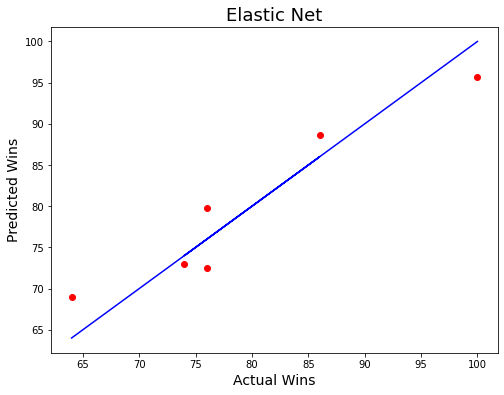

In [178]:
# PLOTTING ELASTIC NET REGRESSOR GRAPH
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=final_pred, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins', fontsize=14)
plt.ylabel('Predicted Wins', fontsize=14)
plt.title('Elastic Net',fontsize=18)
plt.show()

# SAVING MODEL IN PICKLE FORMAT

In [179]:
# pickeling or serialization of a file
import pickle
filename = 'Baseball_Case_Study_Project_final_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

# PREDICTED COCLUSION

In [180]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

,original,predicted
0,100,95.655170
1,76,72.542870
2,74,72.946821
3,86,88.671609
4,76,79.767685
5,64,69.018012


In [183]:
#saving the predicted values into csv
df_comparison.to_csv('Baseball_Case_Study_Prediction.csv')

## CALCULATING MAE

In [187]:
#importing libraries
from sklearn.metrics import mean_absolute_error

In [184]:
#getting predicted/actual csv file
os.chdir("C:\GitBash\Files")
df_comp = pd.read_csv("Baseball_Case_Study_Prediction.csv")
df_comp

,Unnamed: 0,original,predicted
0,0,100,95.655170
1,1,76,72.542870
2,2,74,72.946821
3,3,86,88.671609
4,4,76,79.767685
5,5,64,69.018012


In [185]:
original = df_comp['original']
original

0    100
1     76
2     74
3     86
4     76
5     64
Name: original, dtype: int64

In [186]:
predicted = df_comp['predicted']
predicted

0    95.655170
1    72.542870
2    72.946821
3    88.671609
4    79.767685
5    69.018012
Name: predicted, dtype: float64

In [188]:
#calculating MAE
mean_absolute_error(original,predicted)

3.38540737696524

In [189]:
#calculating mse
MSE = np.square(np.subtract(original,predicted)).mean()
MSE

13.07531113466006

OBSERVATION
MAE MSE  RMSE calculated are very low

# CONCLUSION

### BEST FITTED MODEL FOR BASEBALL CASE STUDY IN MACHINE LEARNING IS FOUND TO BE ELASTIC NET REGRESSOR 

...................................................................................................................